### Data Cleaning using Python 

Cleaning data is a critical step in the data preparation process, ensuring that the data is accurate, complete, and ready for analysis. There are various ways to clean data in Python, depending on the nature of the data and the issues present. Here are several common data cleaning techniques, along with examples and explanations for each: 

##### Step-1: Generate synthetic dataset using Faker

In [3]:
import pandas as pd
import numpy as np
import random
from faker import Faker

# Create a function to generate a synthetic dataset
def generate_synthetic_data():
    fake = Faker()
    data = {
        'Name': [fake.name() for _ in range(1000)],
        'Age': [random.randint(18, 80) for _ in range(1000)],
        'Income': [random.choice([None, random.uniform(10000, 100000)]) for _ in range(1000)],
        'Email': [None if random.random() < 0.2 else fake.email() for _ in range(1000)],
        'Category': [random.choice(['A', 'B', 'C']) for _ in range(1000)],
        'Date': [fake.date_of_birth(minimum_age=18, maximum_age=80) for _ in range(1000)],
        'Text': [fake.sentence() for _ in range(1000)]
    }
    return pd.DataFrame(data)

# Generate synthetic data
df = generate_synthetic_data()

##### Step-2: Let's perform exploratory data analysis (EDA) to gain a deeper understanding of the dataset we have.

In [6]:
# Import necessary libraries for EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Summary Statistics
df.describe()

,Age,Income
count,1000.000000,495.000000
mean,48.275000,56211.313526
std,17.616518,26491.474935
min,18.000000,10015.564843
25%,34.000000,32640.013085
50%,48.000000,57519.997662
75%,63.000000,79628.024499
max,80.000000,99759.413998


In [7]:
# Data Types
df.dtypes

Name         object
Age           int64
Income      float64
Email        object
Category     object
Date         object
Text         object
dtype: object

In [8]:
# Missing Values
df.isnull().sum()

Name          0
Age           0
Income      505
Email       201
Category      0
Date          0
Text          0
dtype: int64

In [9]:
# Distribution of Categorical Variables
df['Category'].value_counts()

C    351
B    332
A    317
Name: Category, dtype: int64

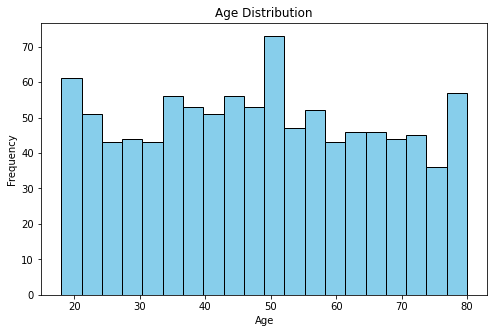

In [10]:
# Histogram for Age
plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

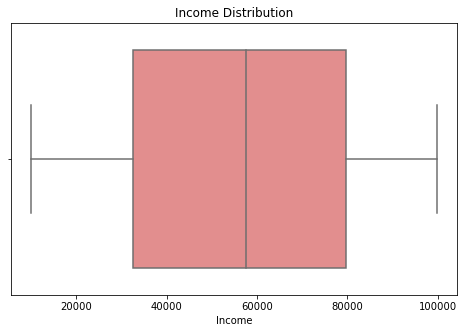

In [11]:
# Box Plot for Income
plt.figure(figsize=(8, 5))
sns.boxplot(x='Income', data=df, color='lightcoral')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.show()

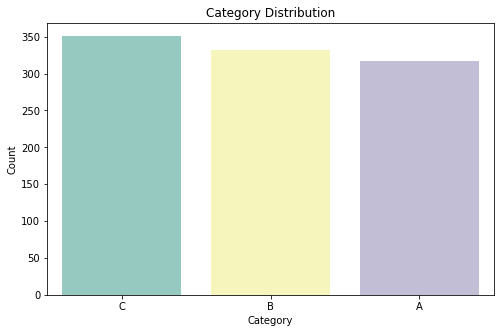

In [12]:
# Countplot for Category
plt.figure(figsize=(8, 5))
sns.countplot(x='Category', data=df, palette='Set3')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [13]:
# Correlation Matrix (for numeric variables)
correlation_matrix = df.corr()
print(correlation_matrix)

             Age    Income
Age     1.000000 -0.087185
Income -0.087185  1.000000


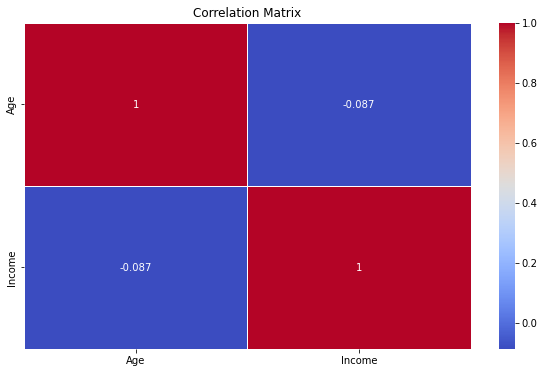

In [14]:
# Heatmap of Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

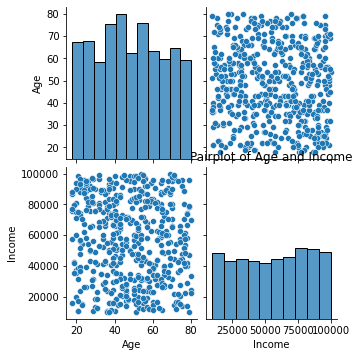

In [15]:
# Example of Pairplot (for selected numeric variables)
sns.pairplot(df[['Age', 'Income']])
plt.title('Pairplot of Age and Income')
plt.show()

##### Step-3: Cleaning data

###### Handling Missing Values:

Explanation: Missing values can disrupt analysis or modeling. Handling missing values involves deciding how to fill or remove them.
Example: We replaced missing values in the 'Age' and 'Income' columns with their respective column means using fillna().

In [16]:
# 1. Explanation: Replace missing values in 'Age' and 'Income' with their respective column means.
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Income'].fillna(df['Income'].mean(), inplace=True)

###### Dealing with Duplicates:

Explanation: Duplicates can distort statistical analysis and may represent data entry errors or repeated observations.
Example: We removed duplicate rows using drop_duplicates() to ensure each row is unique.

In [17]:
# 2. Dealing with Duplicates
# Explanation: Remove duplicate rows to ensure data integrity.
df.drop_duplicates(inplace=True)

###### Outlier Handling (a simple demonstration):

Explanation: Outliers can skew statistical measures and affect the performance of machine learning models. Handling outliers is a critical step, and this example capped extreme values in the 'Income' column.
Example: We used np.where() to replace values in the 'Income' column exceeding 100,000 with 100,000.

In [18]:
# 3. Outlier Handling (a simple demonstration)
# Explanation: Cap extreme values in the 'Income' column.
df['Income'] = np.where(df['Income'] > 100000, 100000, df['Income'])

###### Data Type Conversion:

Explanation: Ensuring data types are appropriate for analysis is crucial. Date columns should be converted to datetime objects for date-related operations.
Example: We used pd.to_datetime() to convert the 'Date' column to datetime objects.

In [19]:
# 4. Data Type Conversion
# Explanation: Convert the 'Date' column to datetime objects.
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

###### Encoding Categorical Data (One-Hot Encoding):

Explanation: Categorical variables need to be converted into numerical representations for machine learning algorithms. One-hot encoding is a common technique.
Example: We applied one-hot encoding using pd.get_dummies() to convert the 'Category' column into binary columns.

In [20]:
# 5. Encoding Categorical Data (One-Hot Encoding)
# Explanation: Convert the 'Category' column into binary columns.
df_encoded = pd.get_dummies(df, columns=['Category'])

###### String Cleaning:

Explanation: Cleaning text data by removing extra spaces and standardizing text can improve text analysis.
Example: We removed leading/trailing spaces and converted text to lowercase in the 'Text' column using string methods.

In [21]:
# 6. String Cleaning
# Explanation: Remove leading/trailing spaces and convert text to lowercase in the 'Text' column.
df['Text'] = df['Text'].str.strip().str.lower()

###### Data Transformation (Log Transformation):

Explanation: Data transformations like log transformation can make skewed data more normally distributed and improve model performance.
Example: We applied a log transformation to the 'Income' column using np.log().

In [22]:
# 7. Data Transformation (Log Transformation)
# Explanation: Apply a log transformation to the 'Income' column.
df['Income'] = np.log(df['Income'] + 1)

###### Data Scaling and Normalization (Min-Max Scaling):

Explanation: Scaling or normalizing numeric features ensures they have consistent scales, which is important for some machine learning algorithms.
Example: We used Min-Max scaling on the 'Age' column with the MinMaxScaler from scikit-learn.

In [23]:
# 8. Data Scaling and Normalization (Min-Max Scaling)
# Explanation: Scale the 'Age' column to a range between 0 and 1.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

###### Handling Inconsistent Data:

Explanation: Ensuring consistency in categorical data by standardizing values can prevent data issues.
Example: We converted all values in the 'Category' column to uppercase for consistency using the .str.upper() method.

In [24]:
# 9. Handling Inconsistent Data
# Explanation: Convert all values in the 'Category' column to uppercase for consistency.
df['Category'] = df['Category'].str.upper()

###### Date and Time Handling (Extracting Year):

Explanation: Extracting relevant information from date and time data (e.g., year, month) can be useful for analysis.
Example: We extracted the year from the 'Date' column using .dt.year.

In [25]:
# 10. Date and Time Handling (Extracting Year)
# Explanation: Extract the year from the 'Date' column.
df['Year'] = df['Date'].dt.year

###### Handling Data Skewness (Log Transformation):

Explanation: Skewed data can affect model performance. Applying transformations like log or Box-Cox can mitigate skewness.
Example: We applied a log transformation to the 'Income' column using np.log().

In [26]:
# 11. Handling Data Skewness (Log Transformation)
# Explanation: Apply a log transformation to address positive skewness in the 'Income' column.
df['Income'] = np.log(df['Income'] + 1)

###### Feature Engineering (Creating 'Age_squared'):

Explanation: Creating new features or modifying existing ones can improve model performance or provide additional insights.
Example: We created a new feature, 'Age_squared,' by squaring the 'Age' column.

In [27]:
# 12. Feature Engineering (Creating 'Age_squared')
# Explanation: Create a new feature by squaring the 'Age' column.
df['Age_squared'] = df['Age'] ** 2

###### Data Validation:

Explanation: Data validation ensures data adheres to predefined constraints or business rules.
Example: We filtered rows where 'Age' is greater than 0 to ensure valid ages.

In [28]:
# 13. Data Validation
# Explanation: Filter rows where 'Age' is greater than 0 to ensure valid ages.
df = df[df['Age'] > 0]

These data cleaning methods are essential for ensuring that the data used for analysis or modeling is accurate, consistent, and suitable for the intended purpose. Depending on the dataset and objectives, you may need to apply a subset of these techniques or additional methods tailored to your specific data quality challenges.

In [29]:
# Display the cleaned dataset
print(df.head())

                Name       Age    Income                       Email Category  \
0      Dwayne Taylor  0.532258  2.479634                        None        C   
1   Brandon Santiago  0.887097  2.479634  guerrerobrandy@example.net        B   
2      Mitchell Moss  0.370968  2.479634          john64@example.net        C   
3  Mr. Daniel Bryant  0.983871  2.479634     wilsonsarah@example.org        C   
4    Sarah Dougherty  0.016129  2.479634          tina39@example.net        B   

        Date                                               Text  Year  \
0 1993-03-31  relationship fine boy and price better necessa...  1993   
1 1958-06-02                            kitchen we there world.  1958   
2 1945-07-28  property manage set relate south difficult cha...  1945   
3 1994-01-28                            arrive may leave music.  1994   
4 1977-03-23                           since short institution.  1977   

   Age_squared  
0     0.283299  
1     0.786941  
2     0.137617  
3     

##### Step-4: Let's perform exploratory data analysis (EDA) after cleaning data

In [30]:
# Summary Statistics
df.describe()

,Age,Income,Year,Age_squared
count,986.000000,986.000000,986.000000,986.000000
mean,0.495240,2.472564,1973.722110,0.323627
std,0.280079,0.037425,18.220195,0.291325
min,0.016129,2.323563,1942.000000,0.000260
25%,0.262097,2.479634,1957.000000,0.068743
50%,0.483871,2.479634,1974.000000,0.234131
75%,0.725806,2.479778,1990.000000,0.526795
max,1.000000,2.526570,2005.000000,1.000000


In [31]:
# Data Types
df.dtypes

Name                   object
Age                   float64
Income                float64
Email                  object
Category               object
Date           datetime64[ns]
Text                   object
Year                    int64
Age_squared           float64
dtype: object

In [32]:
# Missing Values
df.isnull().sum()

Name             0
Age              0
Income           0
Email          197
Category         0
Date             0
Text             0
Year             0
Age_squared      0
dtype: int64

In [33]:
# Distribution of Categorical Variables
df['Category'].value_counts()

C    349
B    328
A    309
Name: Category, dtype: int64

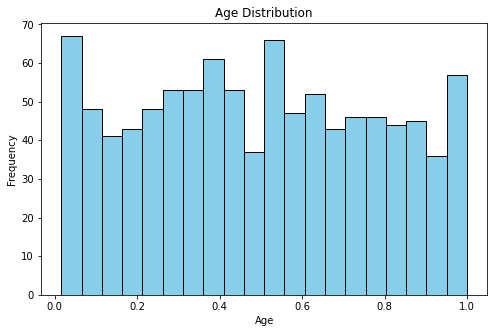

In [34]:
# Histogram for Age
plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

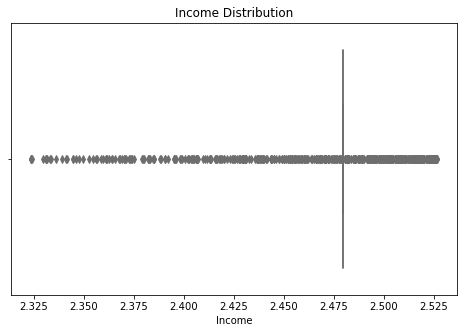

In [35]:
# Box Plot for Income
plt.figure(figsize=(8, 5))
sns.boxplot(x='Income', data=df, color='lightcoral')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.show()

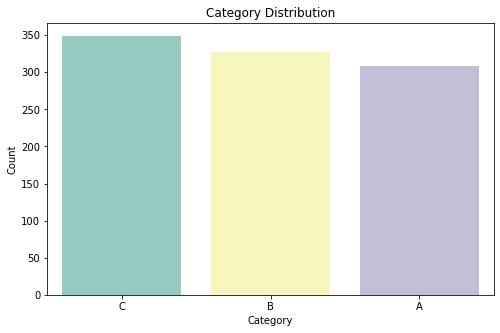

In [36]:
# Countplot for Category
plt.figure(figsize=(8, 5))
sns.countplot(x='Category', data=df, palette='Set3')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [37]:
# Correlation Matrix (for numeric variables)
df.corr()

,Age,Income,Year,Age_squared
Age,1.000000,-0.038120,-0.025763,0.967187
Income,-0.038120,1.000000,0.017420,-0.028185
Year,-0.025763,0.017420,1.000000,-0.036390
Age_squared,0.967187,-0.028185,-0.036390,1.000000


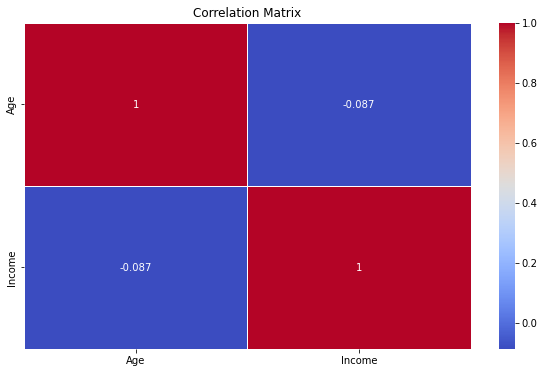

In [38]:
# Heatmap of Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

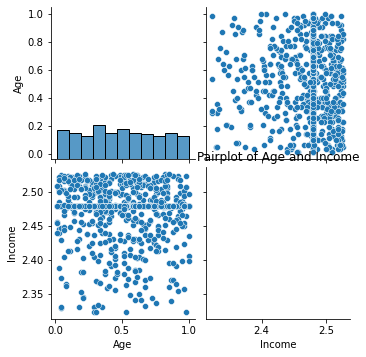

In [41]:
# Example of Pairplot (for selected numeric variables)
sns.pairplot(df[['Age', 'Income']])
plt.title('Pairplot of Age and Income')
plt.show()

These EDA techniques help you understand the dataset's characteristics, identify patterns, detect outliers, and prepare for further analysis or modeling. Depending on your specific research questions or analysis goals, you can perform additional EDA tasks and visualizations.